In [1]:
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR, LinearSVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
import time

#from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('cleaned.csv')
df.head(1)

Unnamed: 0  V_TYPE_18  V_TYPE_10  C_HOUR_04  C_WDAY_6  C_WDAY_6.1  \
0      165385          0          0          0         0           0   

   C_WDAY_1  C_WDAY_1.1  C_MNTH_12  C_HOUR_11  ...  V_TYPE_22  C_MNTH_5  \
0         0           0          0          0  ...          0         0   

   C_WTHR_4  C_WDAY_7  C_WDAY_7.1  C_HOUR_21  C_RSUR_4  C_RCFG_02  C_TRAF_04  \
0         0         0           0          0         0          1          1   

   C_HOUR_14  
0          0  

[1 rows x 119 columns]

In [3]:
df = df.drop(columns = 'Unnamed: 0', axis =0)

In [4]:
(df.columns)

Index(['V_TYPE_18', 'V_TYPE_10', 'C_HOUR_04', 'C_WDAY_6', 'C_WDAY_6.1',
       'C_WDAY_1', 'C_WDAY_1.1', 'C_MNTH_12', 'C_HOUR_11', 'C_HOUR_03',
       ...
       'V_TYPE_22', 'C_MNTH_5', 'C_WTHR_4', 'C_WDAY_7', 'C_WDAY_7.1',
       'C_HOUR_21', 'C_RSUR_4', 'C_RCFG_02', 'C_TRAF_04', 'C_HOUR_14'],
      dtype='object', length=118)

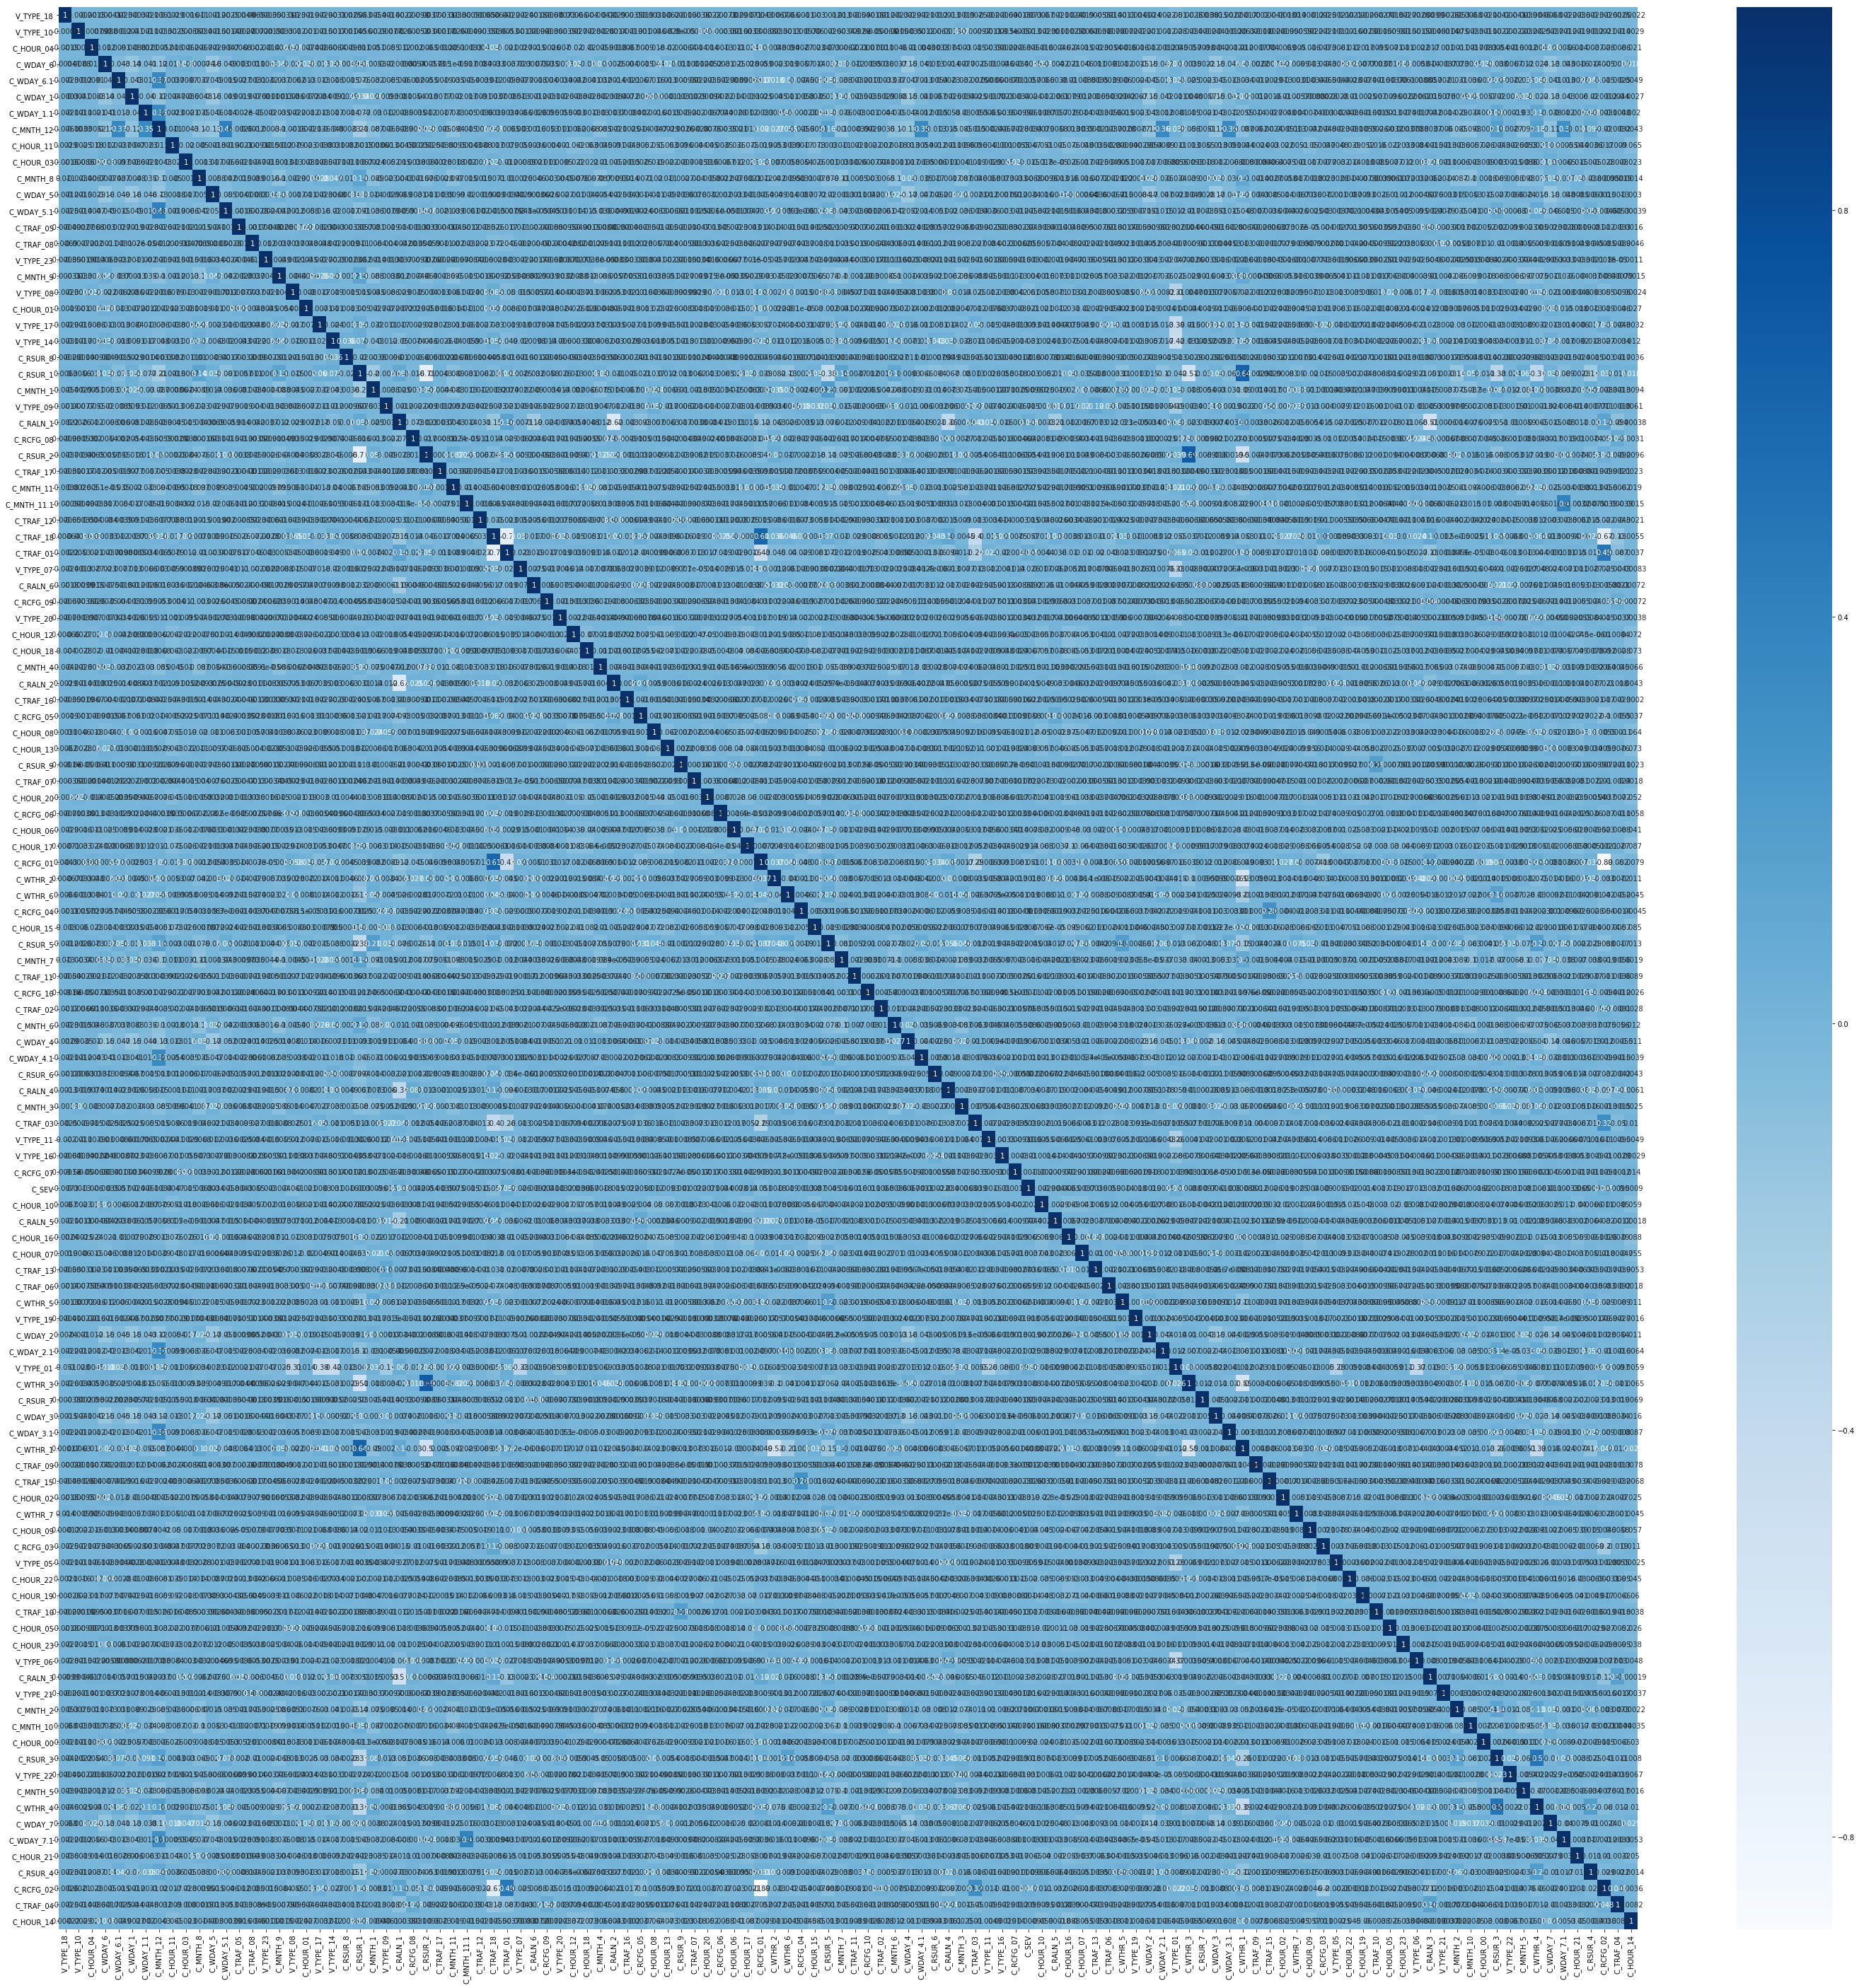

In [5]:
plt.figure(figsize=(50,50))
sns.heatmap( df.corr(), annot=True, cmap=plt.cm.Blues)
plt.show()

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(df.drop(columns = 'C_SEV'), 
                                                      df['C_SEV'], 
                                                      test_size=0.2, 
                                                      random_state = 100)

In [9]:
def fit_and_report(model, X, y, Xv, yv, mode = 'regression'):
    """
    The function computes test and training error for regression or classification ML models.
    
    ----------
    Argument
        
        model : Takes in a class of a ML model
        
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data of predictor
        
        y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Training data of target

        Xv : {array-like, sparse matrix} of shape (n_samples, n_features)
        Validation data of predictor
        
        yv : array-like of shape (n_samples,) or (n_samples, n_targets)  
        Validation data of target
        
        mode : string of models which can be regression or classification
    
    ----------
    Return:
        errors : a list of training and test error
    
    ----------
    Default
        mode : takes in regression as default
    
    
    ----------
    Example
        fit_and_report(svm, X_train, y_train, X_valid, y_valid)
        >>>[13.783656508723558, 23.16818277751387]
    """
    model.fit(X, y)
    if mode.lower().startswith('regress'):
        errors = [mean_squared_error(y, model.predict(X)), mean_squared_error(yv, model.predict(Xv))]
    if mode.lower().startswith('classif'):
        errors = [1 - model.score(X,y), 1 - model.score(Xv,yv)]        
    return errors
### END starter code

In [10]:
lgr = LogisticRegression(solver = 'liblinear')
t = time.time()
lgr_rfe = RFE(estimator= lgr, n_features_to_select=100)
errors_lgr_rfe = fit_and_report(lgr_rfe, X_train, y_train,
                                         X_valid, y_valid, 
                                         mode='classification')
lgr_time = time.time() - t
print('Train error %0.5f'%(errors_lgr_rfe[0]))
print('Test error %0.5f'%(errors_lgr_rfe[1]))

Train error 0.01399
Test error 0.01429


In [11]:
rf = RandomForestClassifier(n_estimators=5)
t = time.time()
rf_rfe = RFE(estimator= rf, n_features_to_select=100)

rf_time = time.time() - t
errors_rf_rfe = fit_and_report(rf_rfe, X_train, y_train,
                                         X_valid, y_valid, 
                                         mode='classification')

print('Train error %0.5f'%(errors_rf_rfe[0]))
print('Test error %0.5f'%(errors_rf_rfe[1]))

Train error 0.00676
Test error 0.01141


In [ ]:
svm = SVC(kernel = 'rbf', gamma = 'scale')
svm_rfe = RFE(estimator= svm, n_features_to_select=100)
t = time.time()
errors_svm_rfe = fit_and_report(svm, X_train, y_train,
                                         X_valid, y_valid, 
                                         mode='classification')
svm_time = time.time() - t
print('Train error %0.5f'%(errors_svm_rfe[0]))
print('Test error %0.5f'%(errors_svm_rfe[1]))

In [ ]:
pd.DataFrame({'Logistic Regression':[errors_lgr_rfe[0], errors_lgr_rfe[1], lgr_time],
              'Random Forest' : [errors_rf_rfe[0],errors_rf_rfe[1], rf_time]})
              #'SVM' : [errors_svm_rfe[0],errors_svm_rfe[1], svm_time]},
#             index = ['Train score', 'Test score', 'Time'])

In [ ]:
confusion_matrix_lgr = (y_train, lgr_rfe.predict(X_train))

confusion_matrix_rfe = (y_train, rf_rfe.predict(X_train))

confusion_matrix_svm = (y_train, svm_rfe.predict(X_train))

In [ ]:
confusion_matrix_lgr = (y_train, lgr_rfe.predict(X_train))

In [ ]:
confusion_matrix_lgr

In [ ]:
df